# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

from keras.utils import np_utils
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
from keras.datasets import cifar10
train, test = cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = np_utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
from tensorflow.keras import optimizers

LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 10
BATCH_SIZE = 256
OPTIMIZER = [optimizers.SGD, optimizers.RMSprop, optimizers.Adagrad, optimizers.Adam]

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
import itertools
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with LR = {lr}, OPTIMIZER: {opti}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = f"exp-lr-{lr}-opti--{opti}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.1, OPTIMIZER: <class 'keras.optimizer_v2.gradient_descent.SGD'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______________________________

C:\Users\jmk80\anaconda3\envs\chatbot-web\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
196/196 [==============================] - 5s 23ms/step - loss: 2.0428 - accuracy: 0.2571 - val_loss: 2.0143 - val_accuracy: 0.2695
Epoch 2/10
196/196 [==============================] - 4s 21ms/step - loss: 1.8222 - accuracy: 0.3464 - val_loss: 1.8113 - val_accuracy: 0.3430
Epoch 3/10
196/196 [==============================] - 4s 19ms/step - loss: 1.7360 - accuracy: 0.3778 - val_loss: 1.7633 - val_accuracy: 0.3604
Epoch 4/10
196/196 [==============================] - 3s 18ms/step - loss: 1.6805 - accuracy: 0.4021 - val_loss: 1.6538 - val_accuracy: 0.4053
Epoch 5/10
196/196 [==============================] - 4s 19ms/step - loss: 1.6217 - accuracy: 0.4220 - val_loss: 1.6458 - val_accuracy: 0.4000
Epoch 6/10
196/196 [==============================] - 4s 18ms/step - loss: 1.5860 - accuracy: 0.4346 - val_loss: 1.9751 - val_accuracy: 0.3110
Epoch 7/10
196/196 [==============================] - 3s 18ms/step - loss: 1.5539 - accuracy: 0.4475 - val_loss: 1.6985 - val_accuracy: 0.4109

C:\Users\jmk80\anaconda3\envs\chatbot-web\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
196/196 [==============================] - 6s 28ms/step - loss: 20203.3555 - accuracy: 0.0995 - val_loss: 2.4020 - val_accuracy: 0.1003
Epoch 2/10
196/196 [==============================] - 5s 25ms/step - loss: 9.6087 - accuracy: 0.0992 - val_loss: 2.3132 - val_accuracy: 0.1000
Epoch 3/10
196/196 [==============================] - 5s 25ms/step - loss: 2.3081 - accuracy: 0.0992 - val_loss: 2.3197 - val_accuracy: 0.1000
Epoch 4/10
196/196 [==============================] - 5s 24ms/step - loss: 2.3081 - accuracy: 0.1008 - val_loss: 2.3096 - val_accuracy: 0.1000
Epoch 5/10
196/196 [==============================] - 5s 27ms/step - loss: 2.3077 - accuracy: 0.1002 - val_loss: 2.3156 - val_accuracy: 0.1000
Epoch 6/10
196/196 [==============================] - 5s 25ms/step - loss: 2.3077 - accuracy: 0.1011 - val_loss: 2.3151 - val_accuracy: 0.1000
Epoch 7/10
196/196 [==============================] - 5s 26ms/step - loss: 2.3079 - accuracy: 0.1014 - val_loss: 2.3107 - val_accuracy: 0.

C:\Users\jmk80\anaconda3\envs\chatbot-web\lib\site-packages\keras\optimizer_v2\adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Epoch 1/10
196/196 [==============================] - 4s 19ms/step - loss: 2.5233 - accuracy: 0.1287 - val_loss: 2.2370 - val_accuracy: 0.1489
Epoch 2/10
196/196 [==============================] - 4s 18ms/step - loss: 2.2117 - accuracy: 0.1636 - val_loss: 2.2297 - val_accuracy: 0.1807
Epoch 3/10
196/196 [==============================] - 3s 18ms/step - loss: 2.0956 - accuracy: 0.2276 - val_loss: 2.0127 - val_accuracy: 0.2590
Epoch 4/10
196/196 [==============================] - 3s 18ms/step - loss: 1.9443 - accuracy: 0.2894 - val_loss: 1.8785 - val_accuracy: 0.3095
Epoch 5/10
196/196 [==============================] - 3s 18ms/step - loss: 1.8568 - accuracy: 0.3273 - val_loss: 1.8917 - val_accuracy: 0.3053
Epoch 6/10
196/196 [==============================] - 3s 17ms/step - loss: 1.7969 - accuracy: 0.3517 - val_loss: 1.7977 - val_accuracy: 0.3457
Epoch 7/10
196/196 [==============================] - 3s 17ms/step - loss: 1.7483 - accuracy: 0.3686 - val_loss: 1.8988 - val_accuracy: 0.3332

C:\Users\jmk80\anaconda3\envs\chatbot-web\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
196/196 [==============================] - 4s 19ms/step - loss: 236.3324 - accuracy: 0.1015 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 2/10
196/196 [==============================] - 3s 17ms/step - loss: 2.3039 - accuracy: 0.1015 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 3/10
196/196 [==============================] - 4s 18ms/step - loss: 2.3042 - accuracy: 0.1006 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 4/10
196/196 [==============================] - 3s 18ms/step - loss: 2.3042 - accuracy: 0.1020 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 5/10
196/196 [==============================] - 3s 17ms/step - loss: 2.3053 - accuracy: 0.1021 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 6/10
196/196 [==============================] - 4s 18ms/step - loss: 2.3050 - accuracy: 0.0966 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 7/10
196/196 [==============================] - 3s 17ms/step - loss: 2.3052 - accuracy: 0.1001 - val_loss: 2.3046 - val_accuracy: 0.10

Epoch 4/10
196/196 [==============================] - 3s 17ms/step - loss: 1.6826 - accuracy: 0.4062 - val_loss: 1.7080 - val_accuracy: 0.3849
Epoch 5/10
196/196 [==============================] - 4s 18ms/step - loss: 1.6410 - accuracy: 0.4193 - val_loss: 1.6284 - val_accuracy: 0.4244
Epoch 6/10
196/196 [==============================] - 3s 17ms/step - loss: 1.6003 - accuracy: 0.4369 - val_loss: 1.6350 - val_accuracy: 0.4166
Epoch 7/10
196/196 [==============================] - 3s 18ms/step - loss: 1.5743 - accuracy: 0.4472 - val_loss: 1.6225 - val_accuracy: 0.4103
Epoch 8/10
196/196 [==============================] - 4s 18ms/step - loss: 1.5403 - accuracy: 0.4563 - val_loss: 1.6926 - val_accuracy: 0.4061
Epoch 9/10
196/196 [==============================] - 4s 18ms/step - loss: 1.5169 - accuracy: 0.4666 - val_loss: 1.6093 - val_accuracy: 0.4341
Epoch 10/10
196/196 [==============================] - 4s 18ms/step - loss: 1.4948 - accuracy: 0.4730 - val_loss: 1.7454 - val_accuracy: 0.392

Epoch 7/10
196/196 [==============================] - 5s 25ms/step - loss: 1.5697 - accuracy: 0.4409 - val_loss: 1.6410 - val_accuracy: 0.4210
Epoch 8/10
196/196 [==============================] - 5s 25ms/step - loss: 1.5338 - accuracy: 0.4554 - val_loss: 1.5645 - val_accuracy: 0.4444
Epoch 9/10
196/196 [==============================] - 5s 25ms/step - loss: 1.4998 - accuracy: 0.4647 - val_loss: 1.6094 - val_accuracy: 0.4254
Epoch 10/10
196/196 [==============================] - 5s 25ms/step - loss: 1.4716 - accuracy: 0.4728 - val_loss: 1.5677 - val_accuracy: 0.4383
Experiment with LR = 0.001, OPTIMIZER: <class 'keras.optimizer_v2.adagrad.Adagrad'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376  

Epoch 10/10
196/196 [==============================] - 4s 19ms/step - loss: 2.1983 - accuracy: 0.2263 - val_loss: 2.1940 - val_accuracy: 0.2282
Experiment with LR = 0.0001, OPTIMIZER: <class 'keras.optimizer_v2.rmsprop.RMSprop'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                              

 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 4s 20ms/step - loss: 2.4044 - accuracy: 0.0997 - val_loss: 2.3996 - val_accuracy: 0.0987
Epoch 2/10
196/196 [==============================] - 4

                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 5s 24ms/step - loss: 2.1302 - accuracy: 0.2429 - val_loss: 1.9995 - val_accuracy: 0.3011
Epoch 2/10
196/196 [==============================] - 5s 23ms/step - loss: 1.9438 - accuracy: 0.3229 - val_loss: 1.8958 - val_accuracy: 0.3389
Epoch 3/10
196/196 [==============================] - 5s 23ms/step - loss: 1.8692 - accuracy: 0.3481 - val_loss: 1.8442 - val_accuracy: 0.3611
Epoch 4/10
196/196 [==============================] - 5s 24ms/step - loss: 1.8213 - accuracy: 0.3678 - val_loss: 1.8026 - val_accuracy: 0.3751
Epoch 5/10
196/196 [==============================] - 4s 23ms/step - loss: 1.7851 - accu

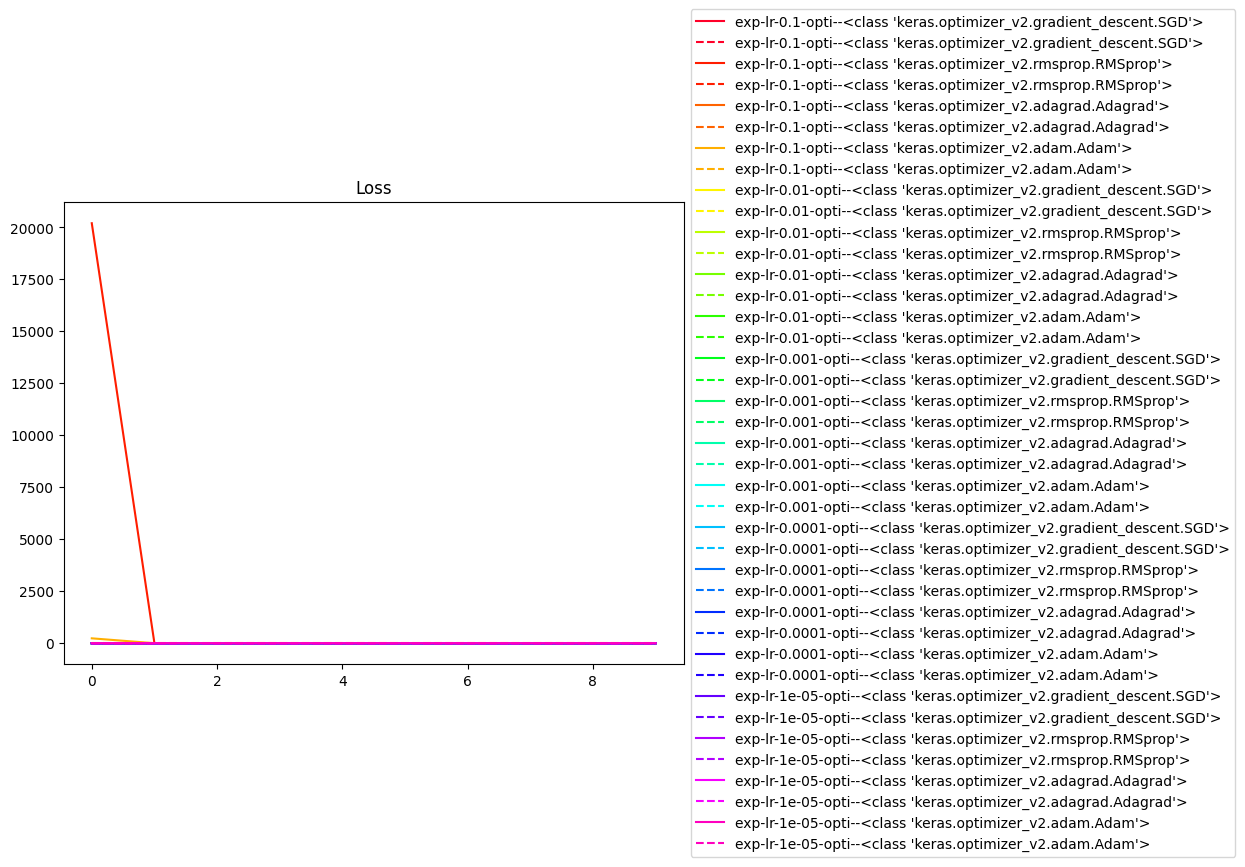

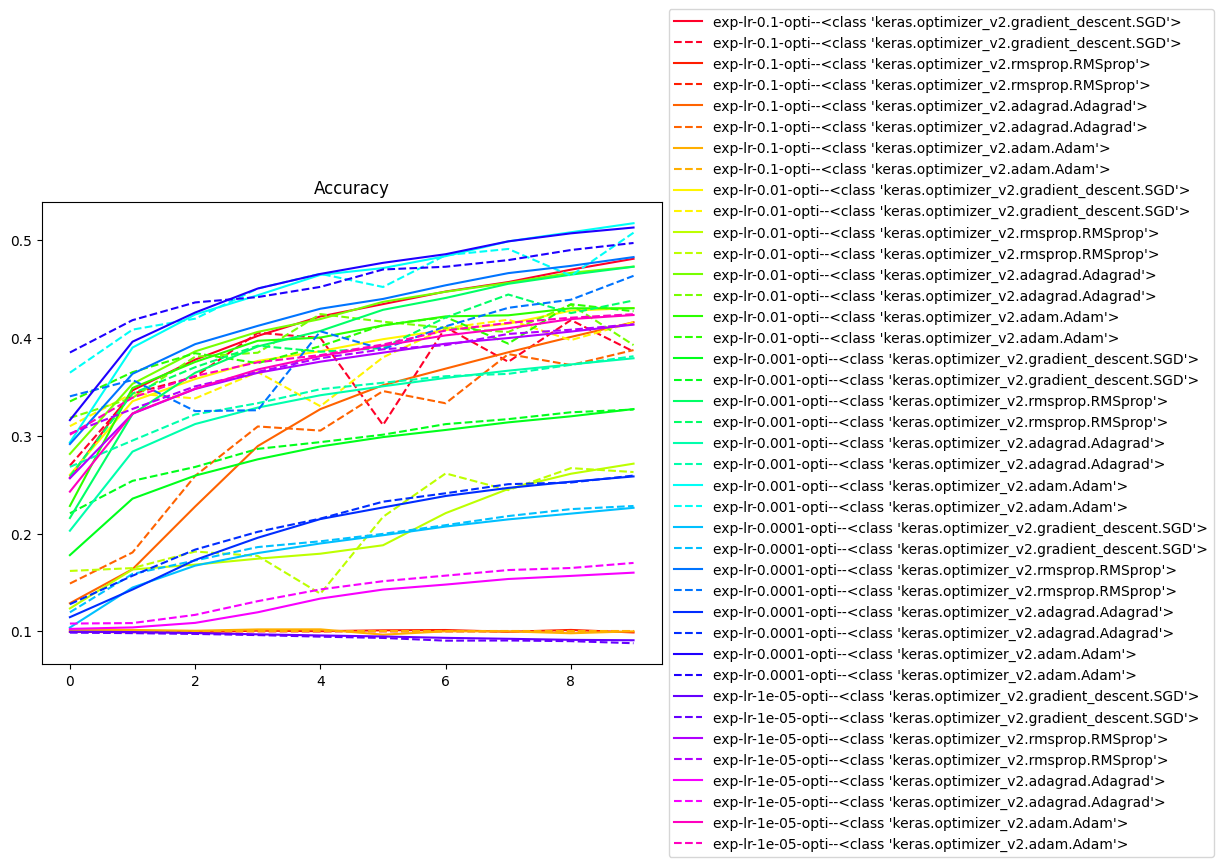

In [11]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm as mplcm
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()